# Exploratory Data Analysis Starter

## Import packages

In [1]:
#Data analysis and wrangling libraries
import pandas as pd
import numpy as np

#Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Shows plots in jupyter notebook
%matplotlib inline

#Set plot style
sns.set(color_codes=True)

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

#To display each column of our dataset
pd.set_option('display.max_columns',None)

Displaying the first 5 and last 5 rows of our dataframe

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
client_df.tail()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [6]:
price_df.tail()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


***Data Description for:***

(i) **client_data.csv**

● id = client company identifier

● activity_new = category of the company’s activity

● channel_sales = code of the sales channel

● cons_12m = electricity consumption of the past 12 months

● cons_gas_12m = gas consumption of the past 12 months

● cons_last_month = electricity consumption of the last month

● date_activ = date of activation of the contract

● date_end = registered date of the end of the contract

● date_modif_prod = date of the last modification of the product

● date_renewal = date of the next contract renewal

● forecast_cons_12m = forecasted electricity consumption for next 12 months

● forecast_cons_year = forecasted electricity consumption for the next calendar year

● forecast_discount_energy = forecasted value of current discount

● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months

● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

● forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

● has_gas = indicated if client is also a gas client

● imp_cons = current paid consumption

● margin_gross_pow_ele = gross margin on power subscription

● margin_net_pow_ele = net margin on power subscription

● nb_prod_act = number of active products and services

● net_margin = total net margin

● num_years_antig = antiquity of the client (in number of years)

● origin_up = code of the electricity campaign the customer first subscribed to

● pow_max = subscribed power

● churn = has the client churned over the next 3 months

(ii) **price_data.csv**

● id = client company identifier

● price_date = reference date

● price_off_peak_var = price of energy for the 1st period (off peak)

● price_peak_var = price of energy for the 2nd period (peak)

● price_mid_peak_var = price of energy for the 3rd period (mid peak)

● price_off_peak_fix = price of power for the 1st period (off peak)

● price_peak_fix = price of power for the 2nd period (peak)

● price_mid_peak_fix = price of power for the 3rd period (mid peak)

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

Here the columns "date_activ", "date_end" "date_modif_prod" and "date_renewal" have datatype as object so we have to convert them into datetime datatype using to_datetime function of Pandas library

In [8]:
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])
client_df['date_end'] = pd.to_datetime(client_df['date_end'])
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'])
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'])

In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [10]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
#Here the datatype of "price_date" column is to be changed to datetime
price_df["price_date"]=pd.to_datetime(price_df["price_date"])

In [12]:
#Shape of the dataframes
print(client_df.shape)
print(price_df.shape)

(14606, 26)
(193002, 8)


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [13]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [14]:
price_df.describe()

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,2015-06-16 12:50:49.933161216,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,2015-07-01 00:00:00,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,2015-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
std,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592


In [15]:
#Handling Null values(if any)
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [16]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [17]:
#The number of customers who stayed and the ones who churned
client_df['churn'].value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

In [18]:
#Churn Percentage
client_df['churn'].value_counts(normalize=True).get(1,0)*100

9.715185540188962

Approximately 10% of the customers have churned

## Data visualization

In [19]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

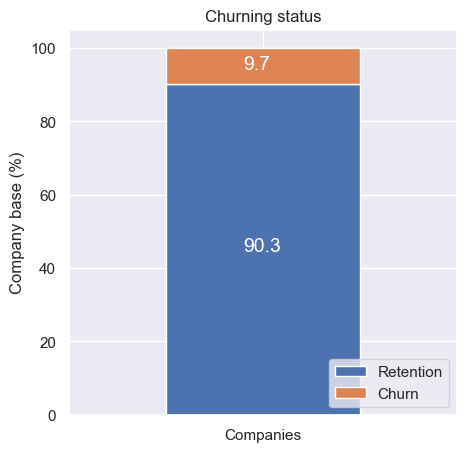

In [20]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The sales channel analysis for better customer retentivity

In [21]:
channel=client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1)

In [22]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

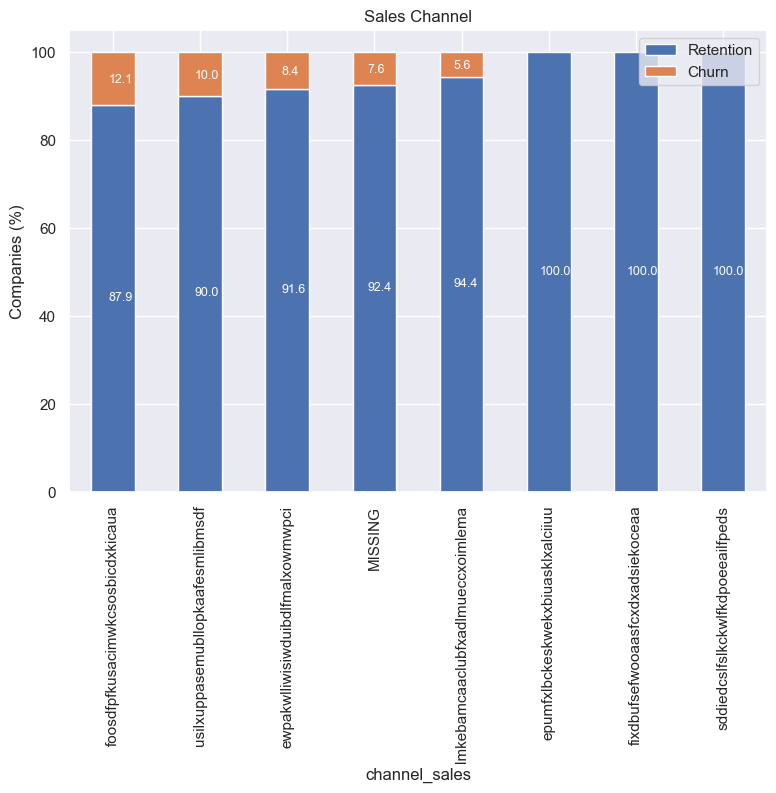

In [23]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(9,6),rot=90)
annotate_stacked_bars(ax, textsize=9)
plt.title('Sales Channel')
plt.legend(['Retention','Churn'])
plt.ylabel('Companies (%)')
plt.show()

#### Consumption

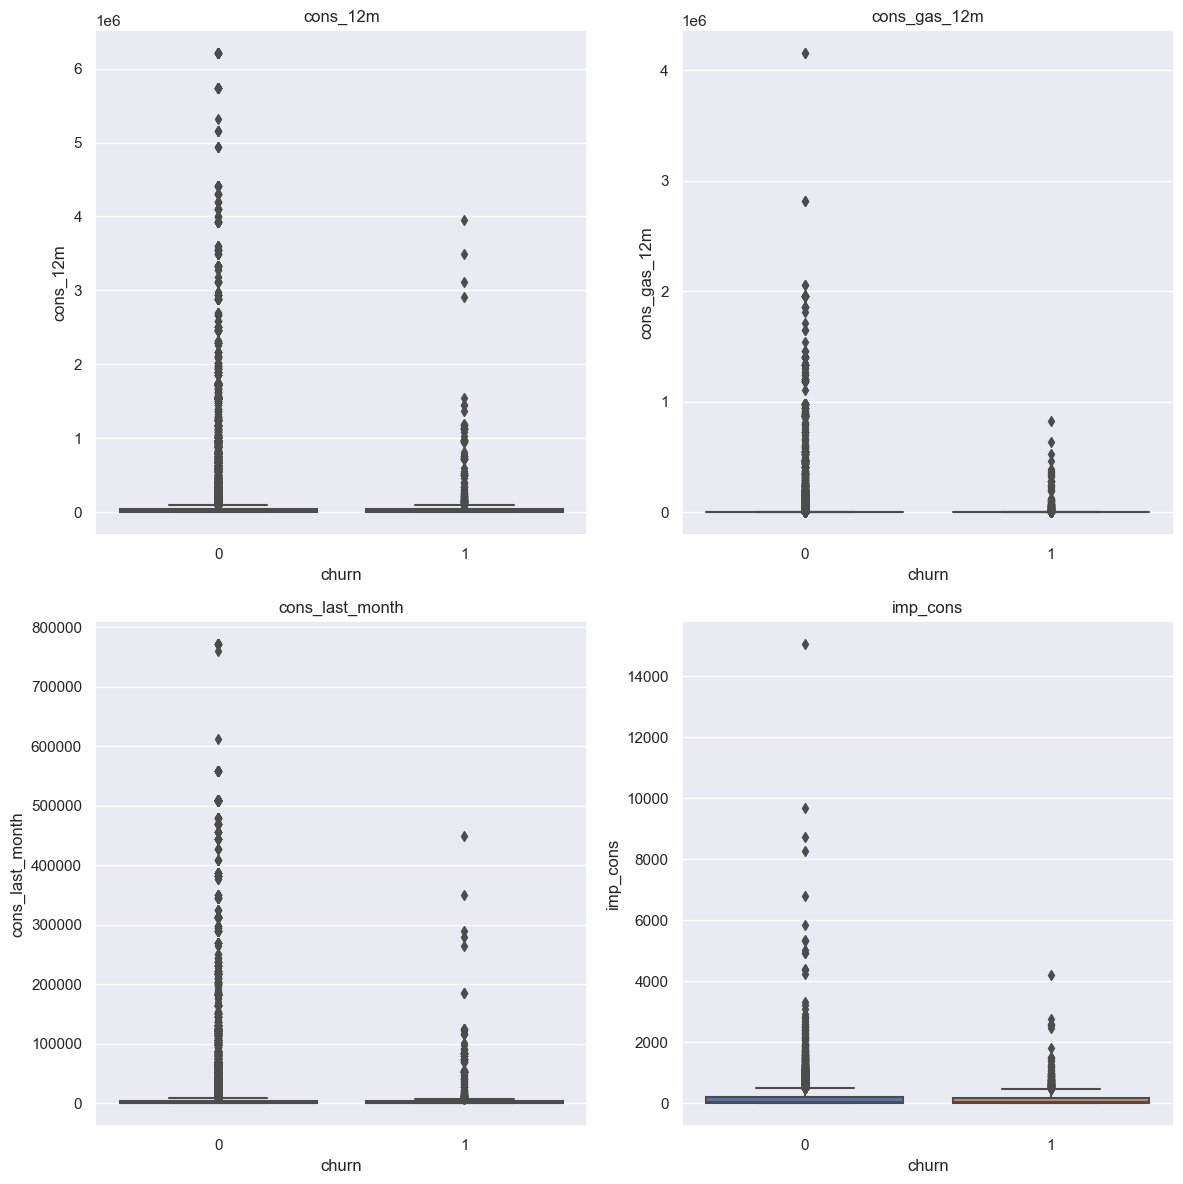

In [24]:
#Plotting boxplot of consumption in last 12 months and last month
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.boxplot(x='churn', y='cons_12m', data=client_df, ax=axs[0, 0])
axs[0, 0].set_title("cons_12m")
sns.boxplot(x='churn', y='cons_gas_12m', data=client_df, ax=axs[0, 1])
axs[0, 1].set_title("cons_gas_12m")
sns.boxplot(x='churn', y='cons_last_month', data=client_df, ax=axs[1, 0])
axs[1, 0].set_title("cons_last_month")
sns.boxplot(x='churn', y='imp_cons', data=client_df, ax=axs[1, 1])
axs[1, 1].set_title("imp_cons")

plt.tight_layout()
plt.show()

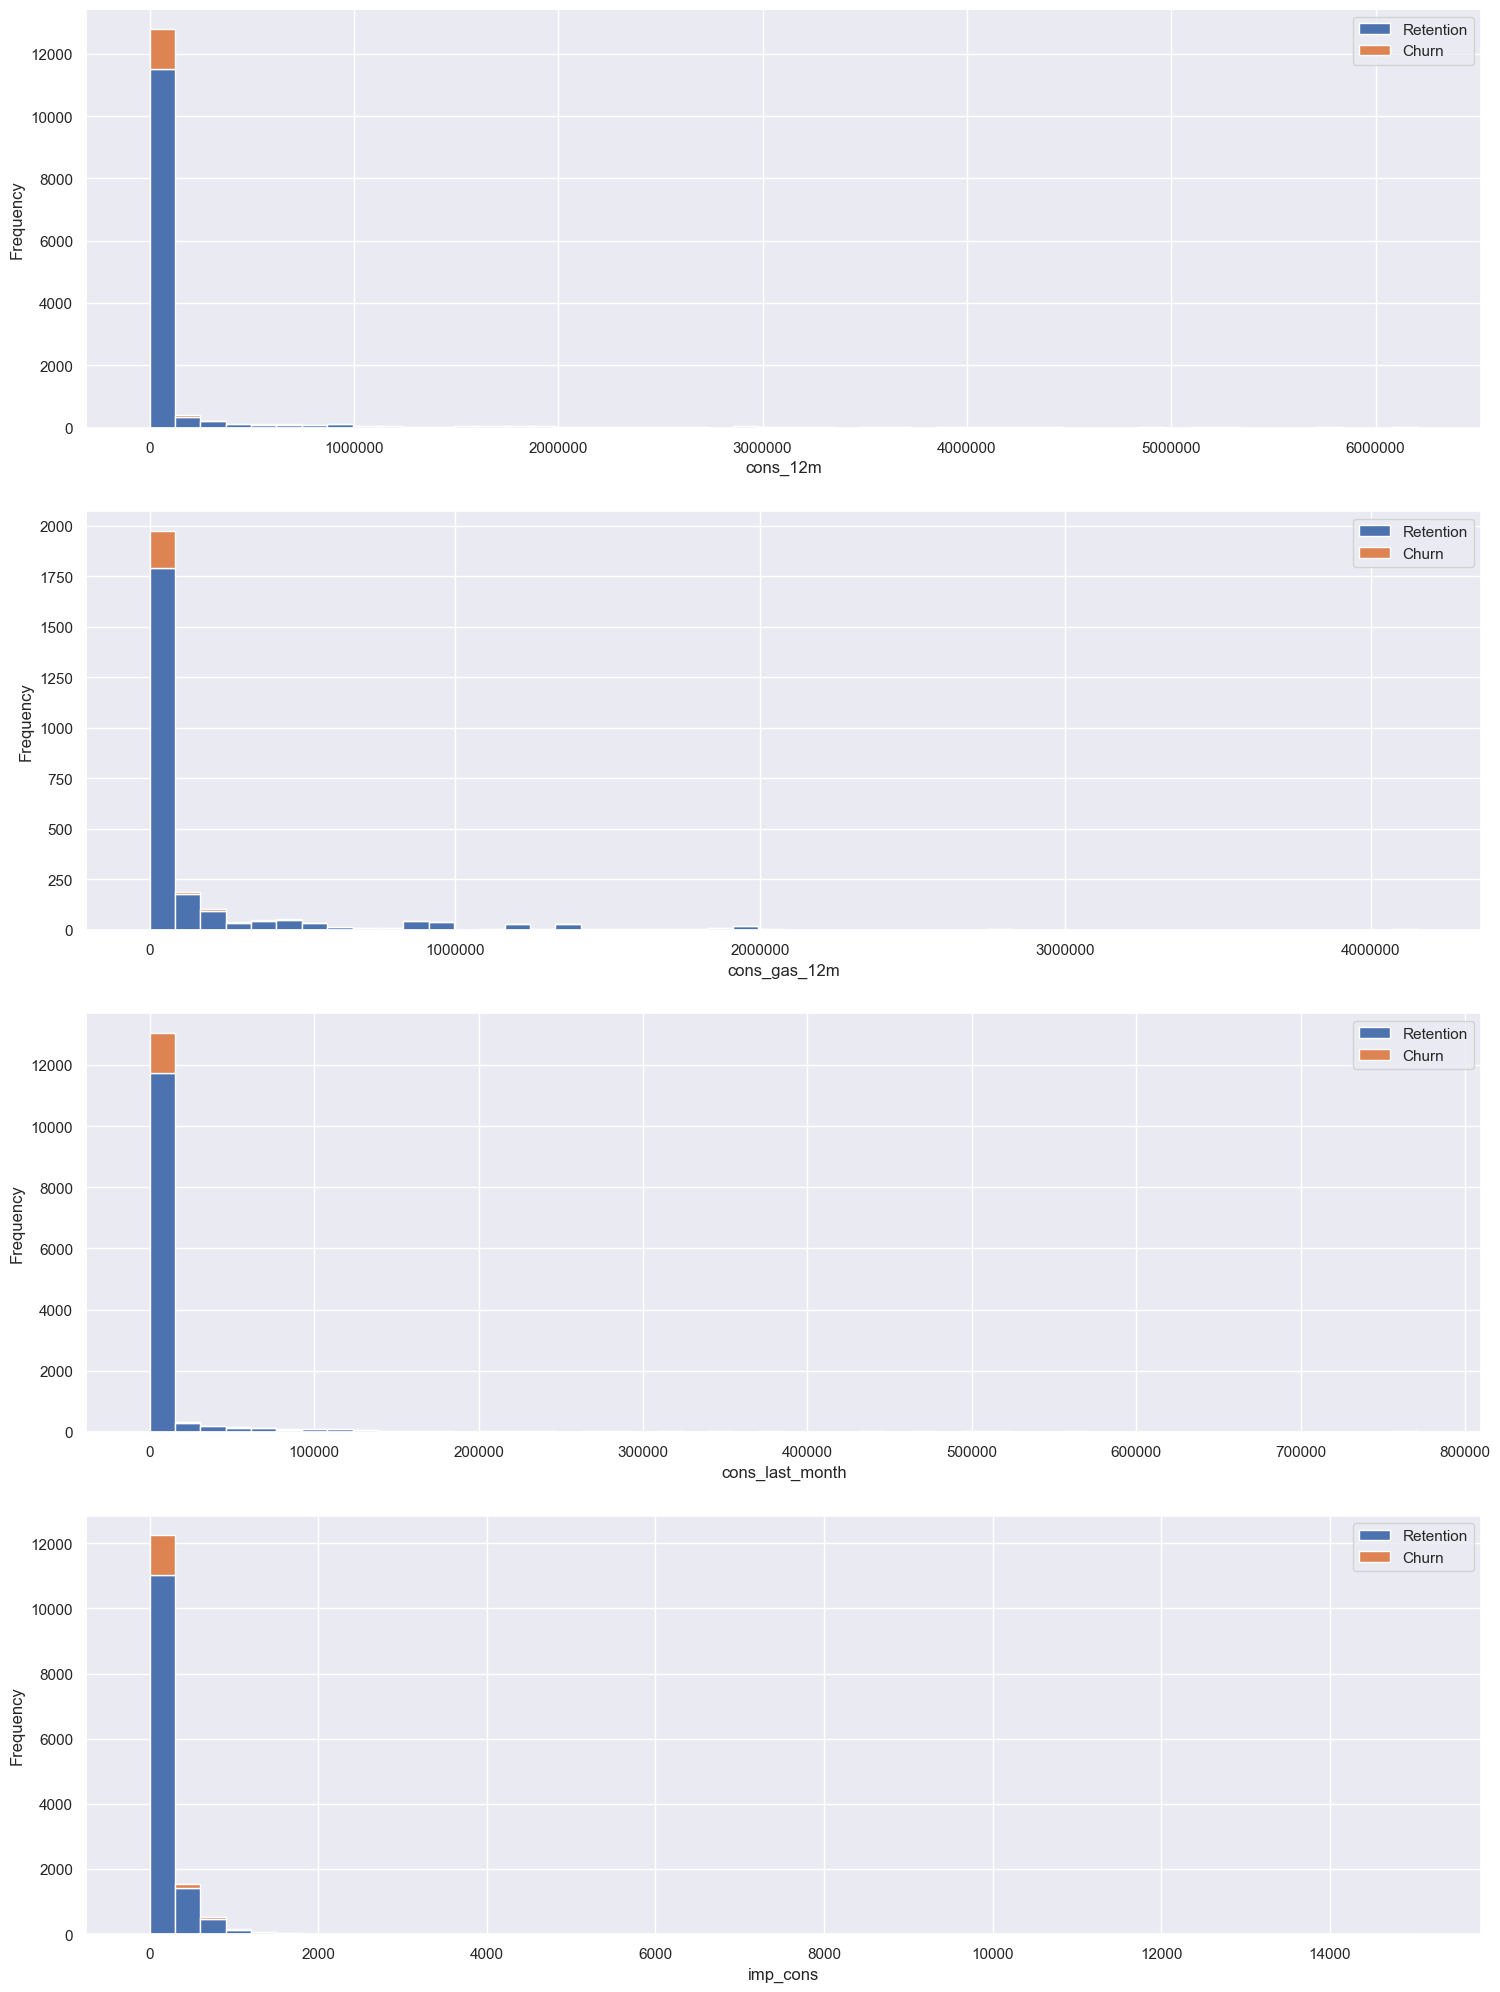

In [25]:
#to check the spread of data
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

#### Forecast

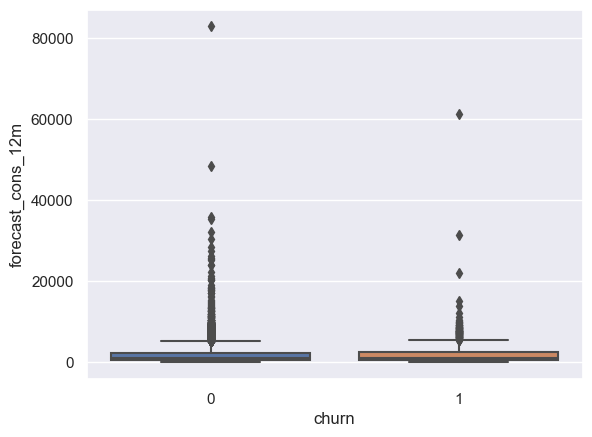

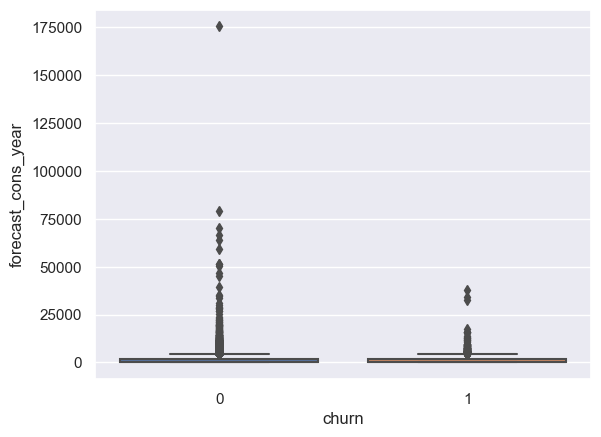

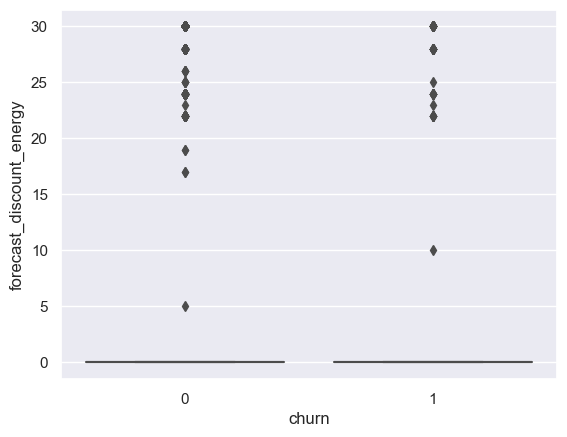

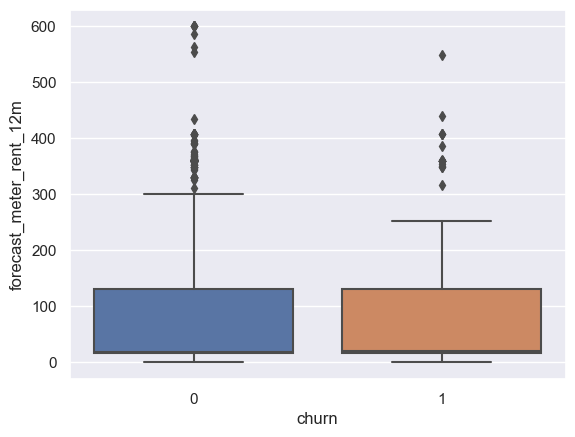

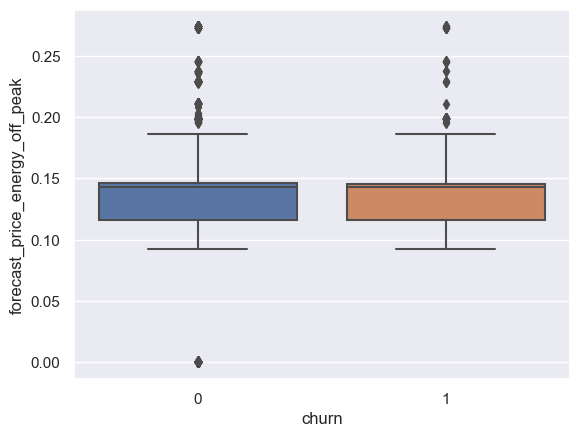

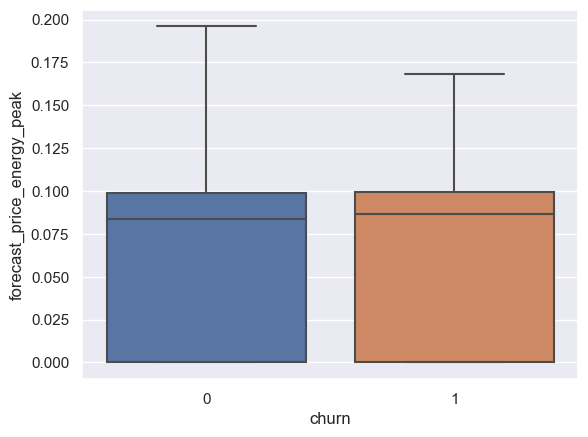

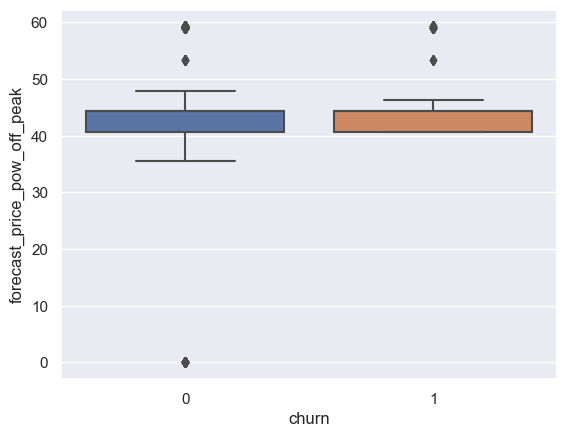

In [26]:
#Plotting boxplots of various forecasts
sns.boxplot(x='churn', y='forecast_cons_12m', data=client_df)
plt.show()
sns.boxplot(x='churn', y='forecast_cons_year', data=client_df)
plt.show()
sns.boxplot(x='churn', y='forecast_discount_energy', data=client_df)
plt.show()
sns.boxplot(x='churn', y='forecast_meter_rent_12m', data=client_df)
plt.show()
sns.boxplot(x='churn', y='forecast_price_energy_off_peak', data=client_df)
plt.show()
sns.boxplot(x='churn', y='forecast_price_energy_peak', data=client_df)
plt.show()
sns.boxplot(x='churn', y='forecast_price_pow_off_peak', data=client_df)
plt.show()

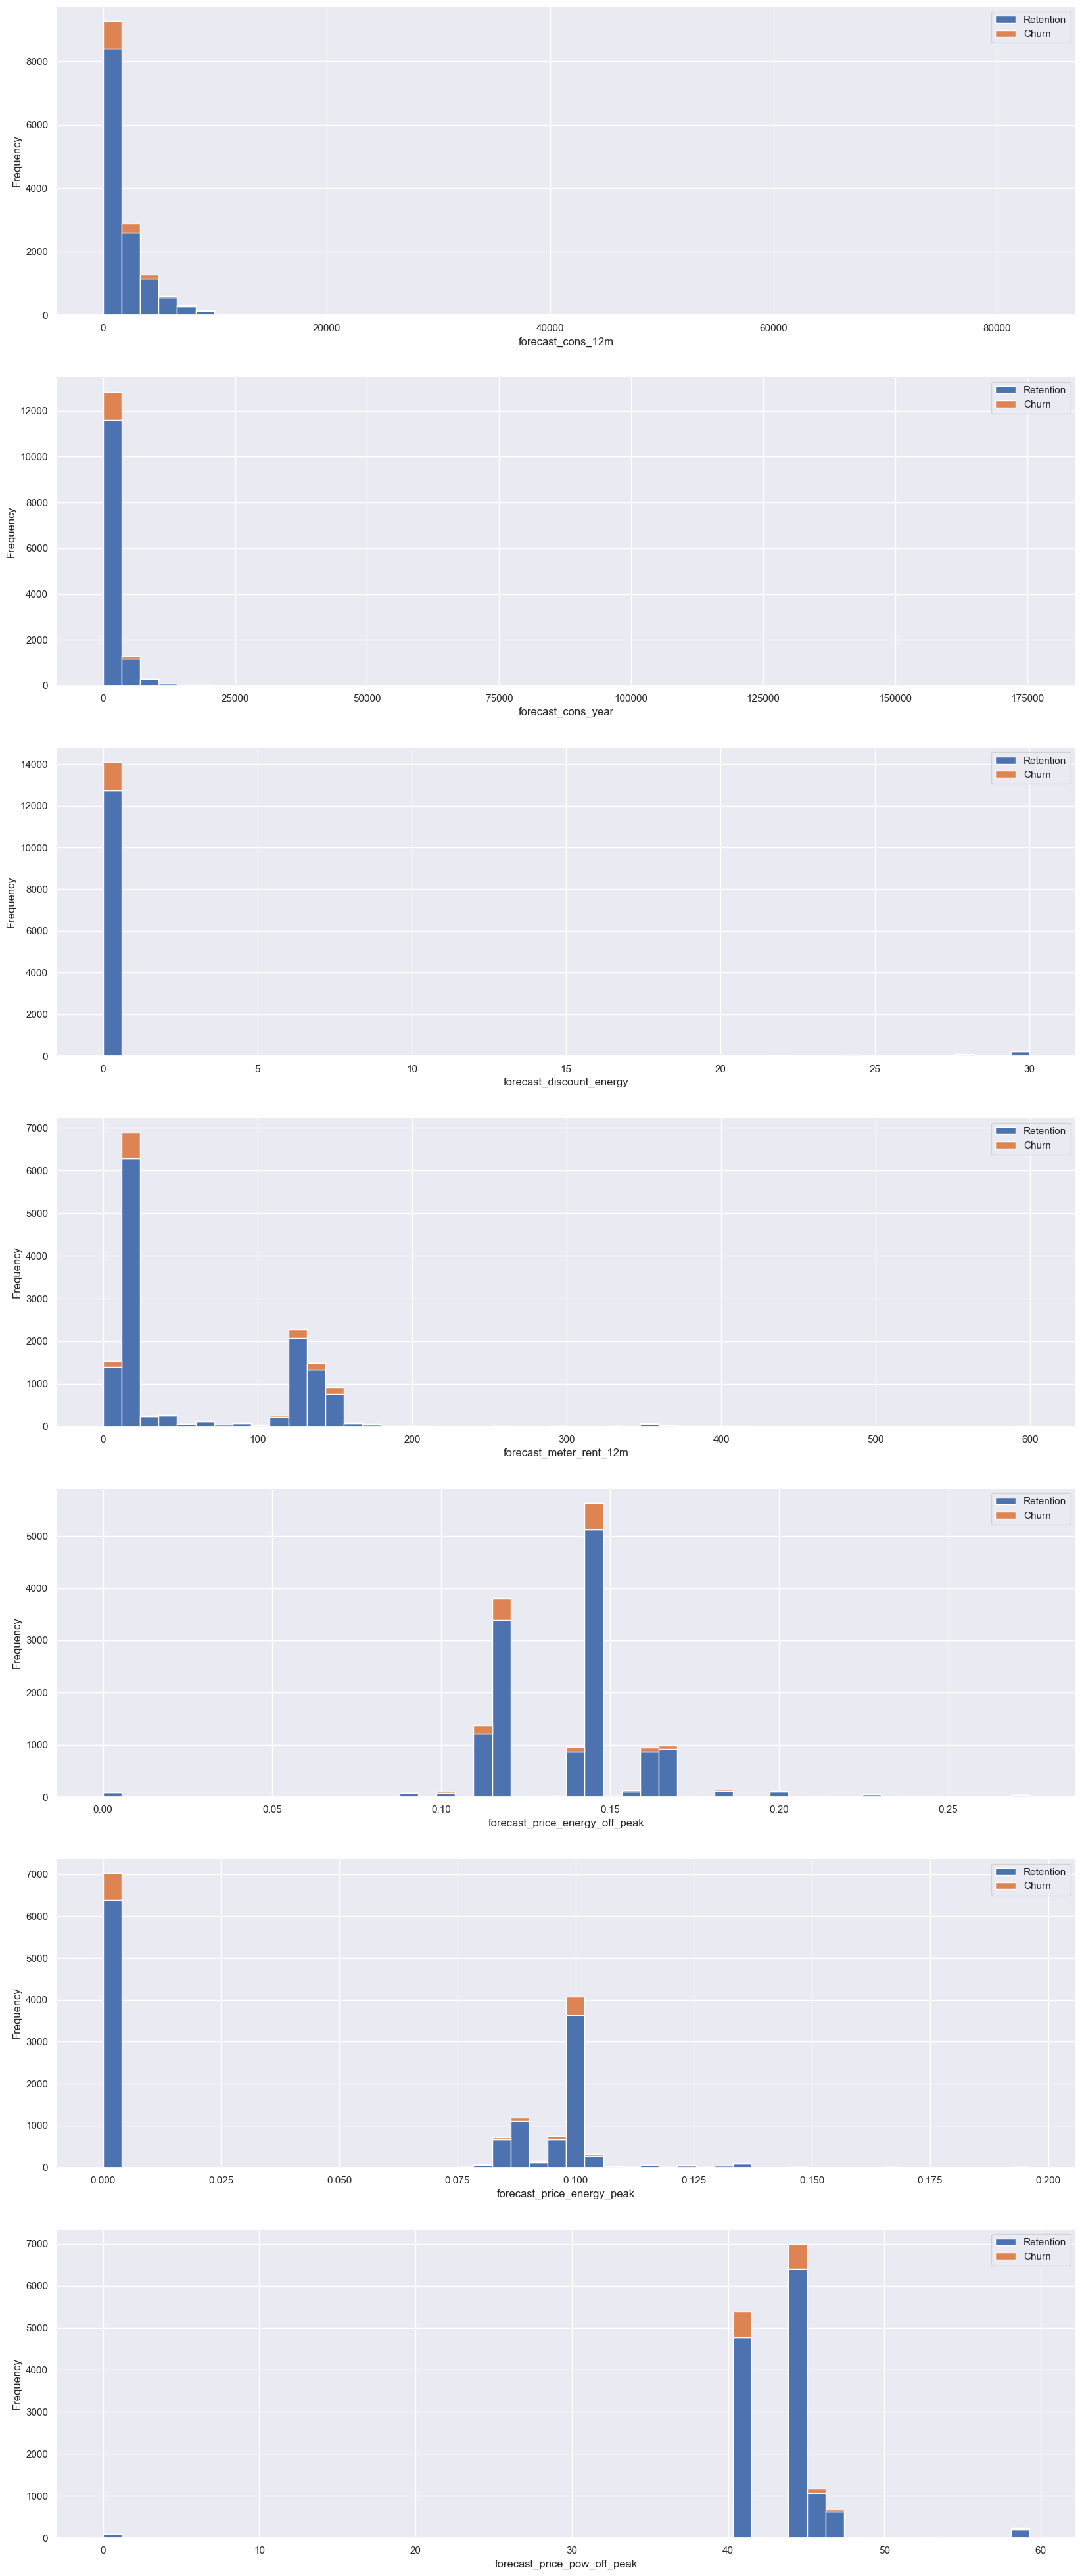

In [27]:
# Plot histograms for the spread and skewness of data
fig, axs = plt.subplots(nrows=7, figsize=(20,50))


plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

### Contract Types

Distribution by contract types

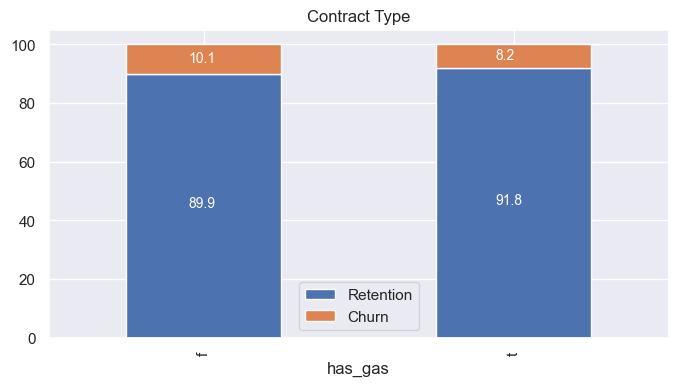

In [28]:
contract_type = client_df[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(8,4))
annotate_stacked_bars(ax, textsize=10)
plt.legend(['Retention','Churn'])
plt.title("Contract Type")
plt.show()

Non contracted customers have higher churn rates

### Margin distributions

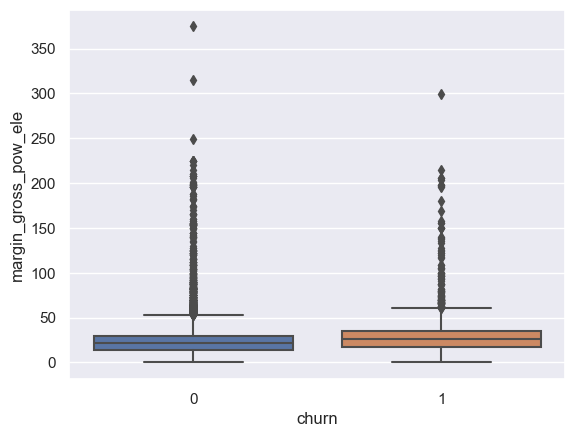

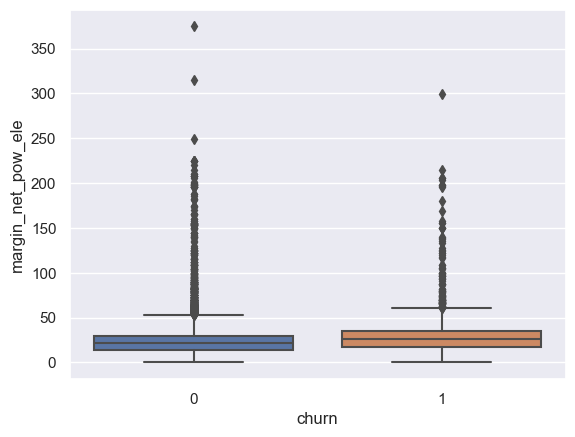

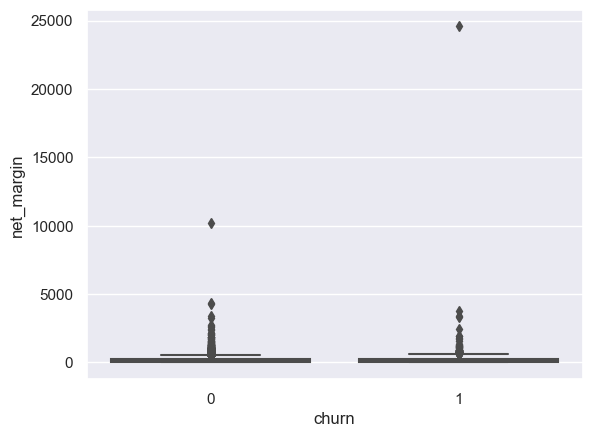

In [29]:
sns.boxplot(x='churn', y='margin_gross_pow_ele', data=client_df)
plt.show()
sns.boxplot(x='churn', y='margin_net_pow_ele', data=client_df)
plt.show()
sns.boxplot(x='churn', y='net_margin', data=client_df)
plt.show()

### Subscribed power

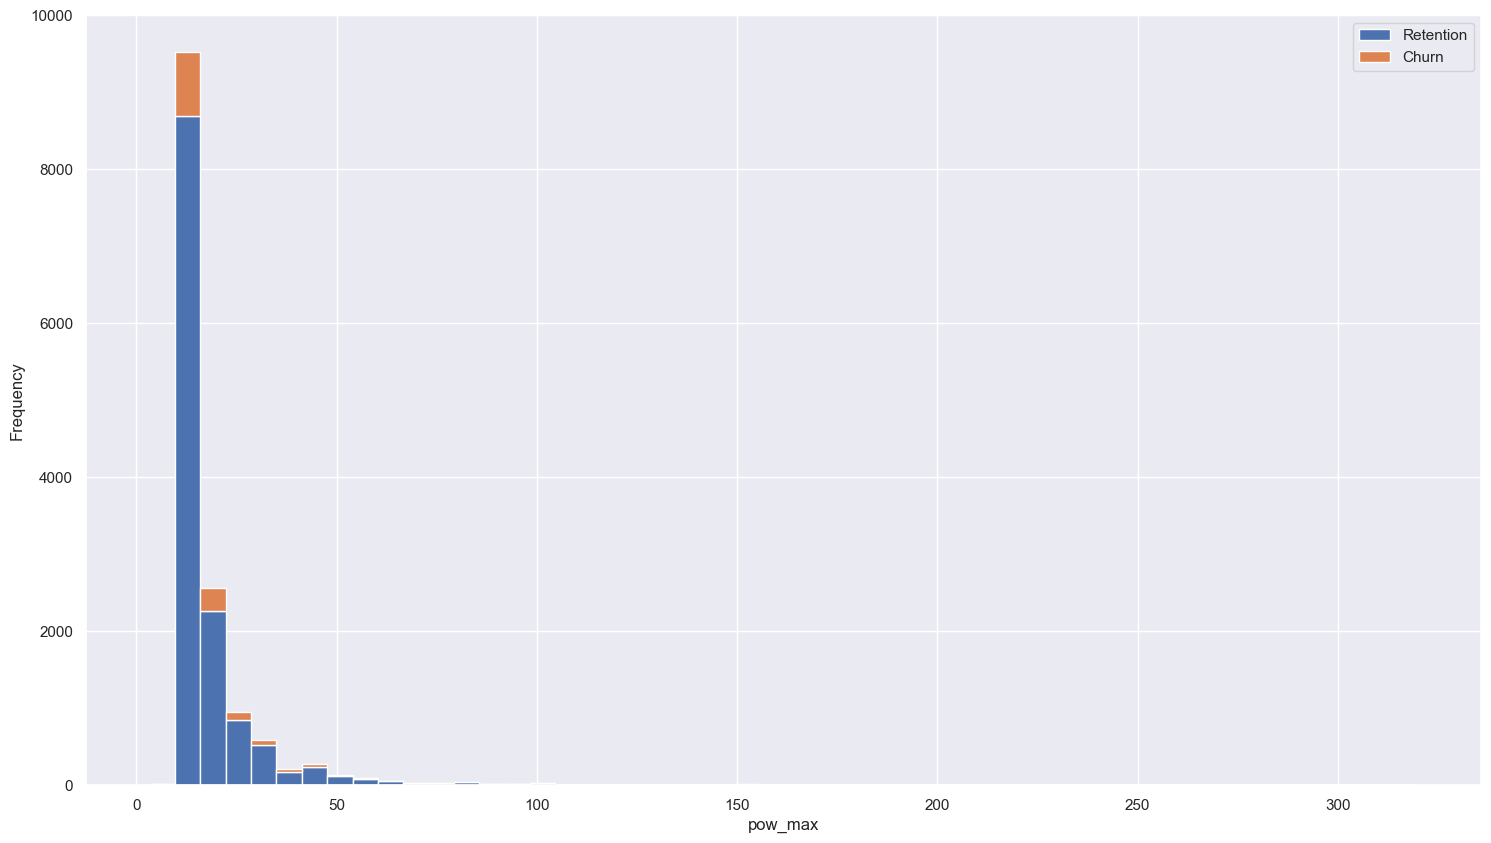

In [30]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(client_df, 'pow_max', axs)

### Others

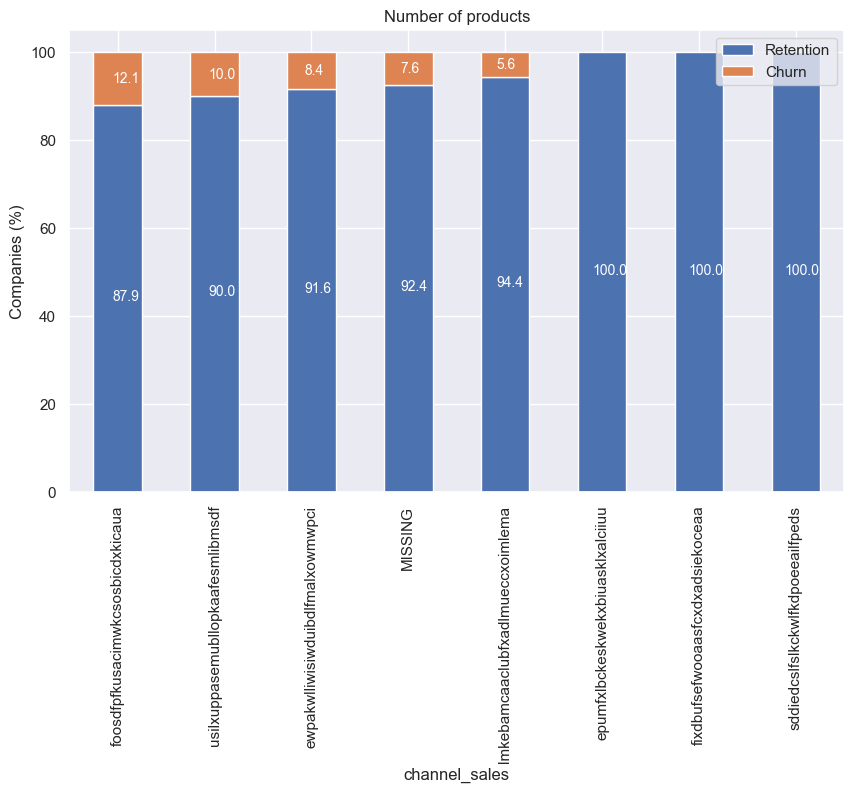

In [31]:
#By Number of Products
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(10,6),rot=90)
annotate_stacked_bars(ax, textsize=10)
plt.title('Number of products')
plt.legend(['Retention','Churn'])
plt.ylabel('Companies (%)')
plt.show()

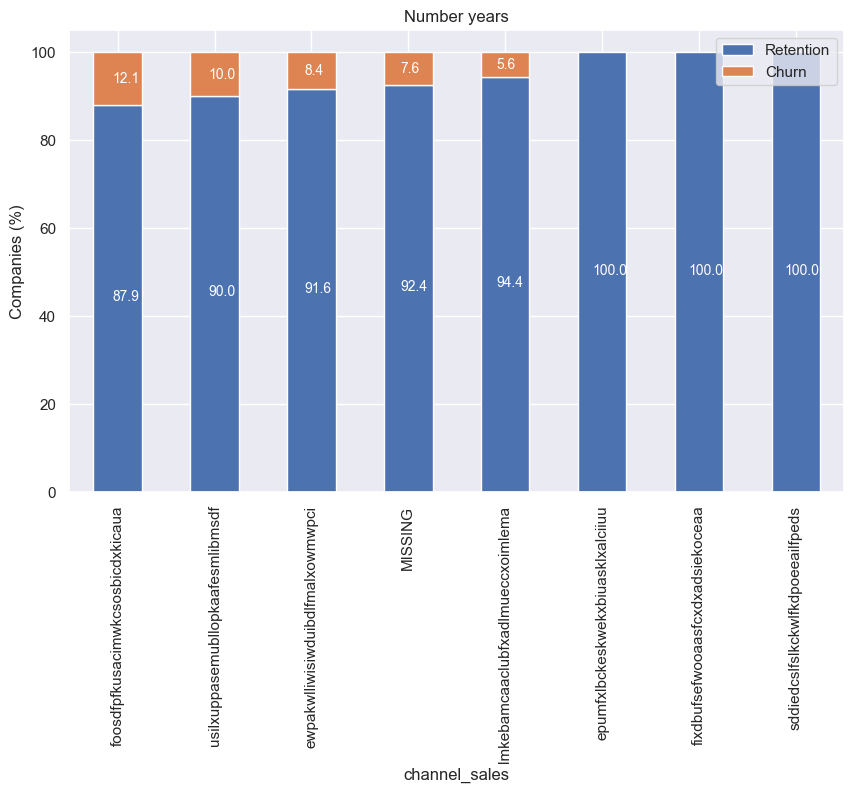

In [32]:
#By number of years
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(10,6),rot=90)
annotate_stacked_bars(ax, textsize=10)
plt.title('Number years')
plt.legend(['Retention','Churn'])
plt.ylabel('Companies (%)')
plt.show()

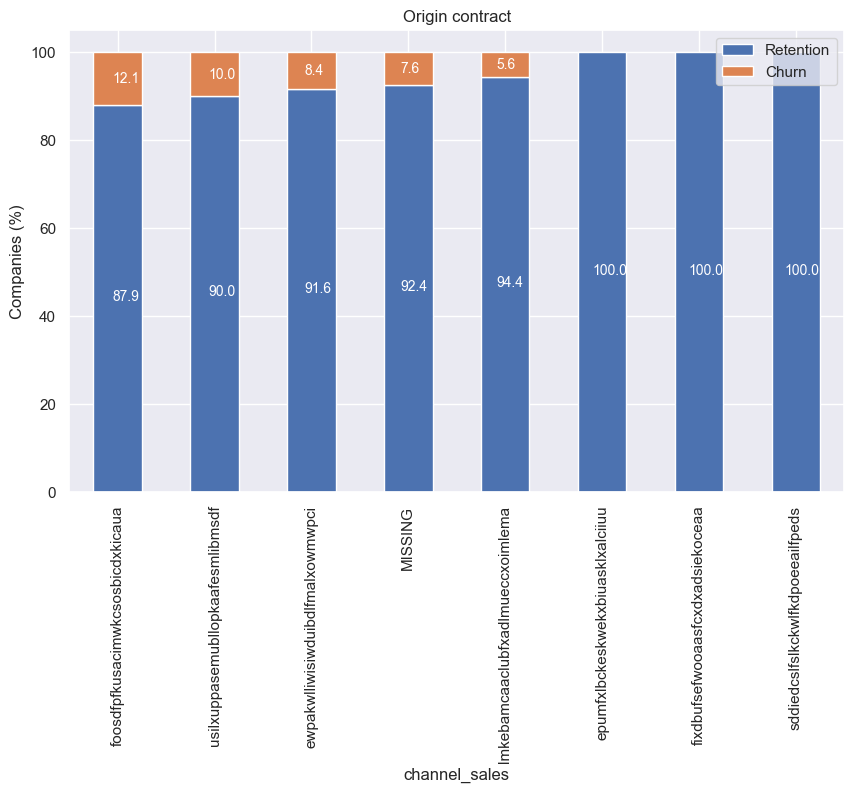

In [33]:
#By original contract
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(10,6),rot=90)
annotate_stacked_bars(ax, textsize=10)
plt.title('Origin contract')
plt.legend(['Retention','Churn'])
plt.ylabel('Companies (%)')
plt.show()

### The price data

In [34]:
price_df['id'].value_counts().value_counts()

count
12    15990
11       83
10       11
9         6
8         3
7         3
Name: count, dtype: int64

In [35]:
price_df['price_date'].value_counts()

price_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

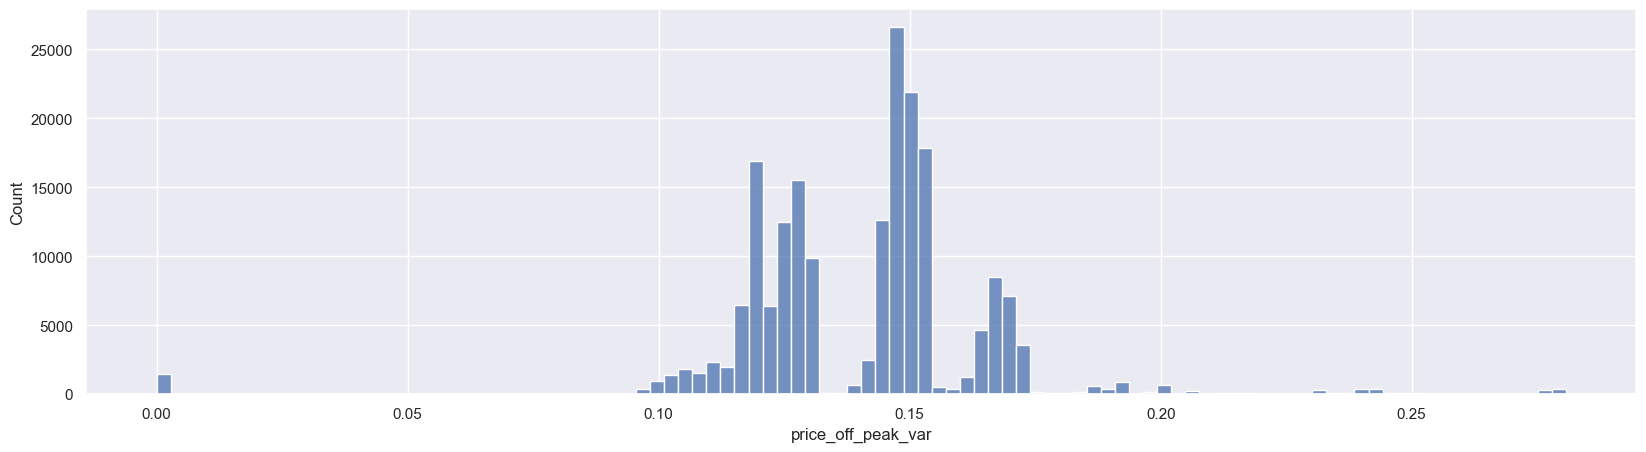

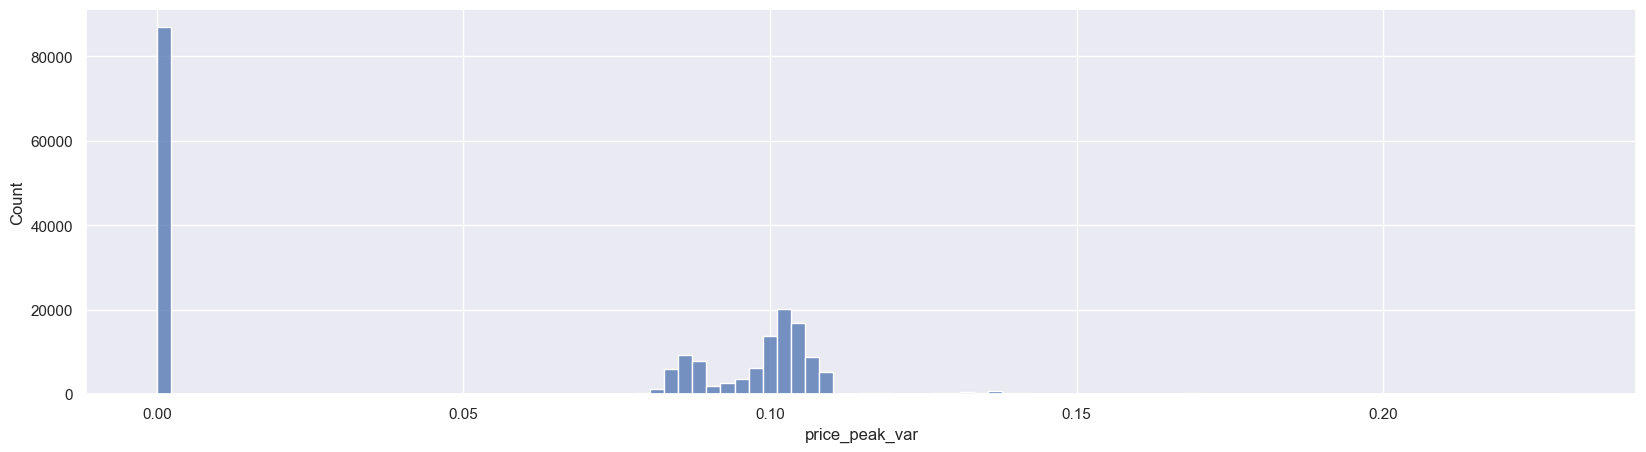

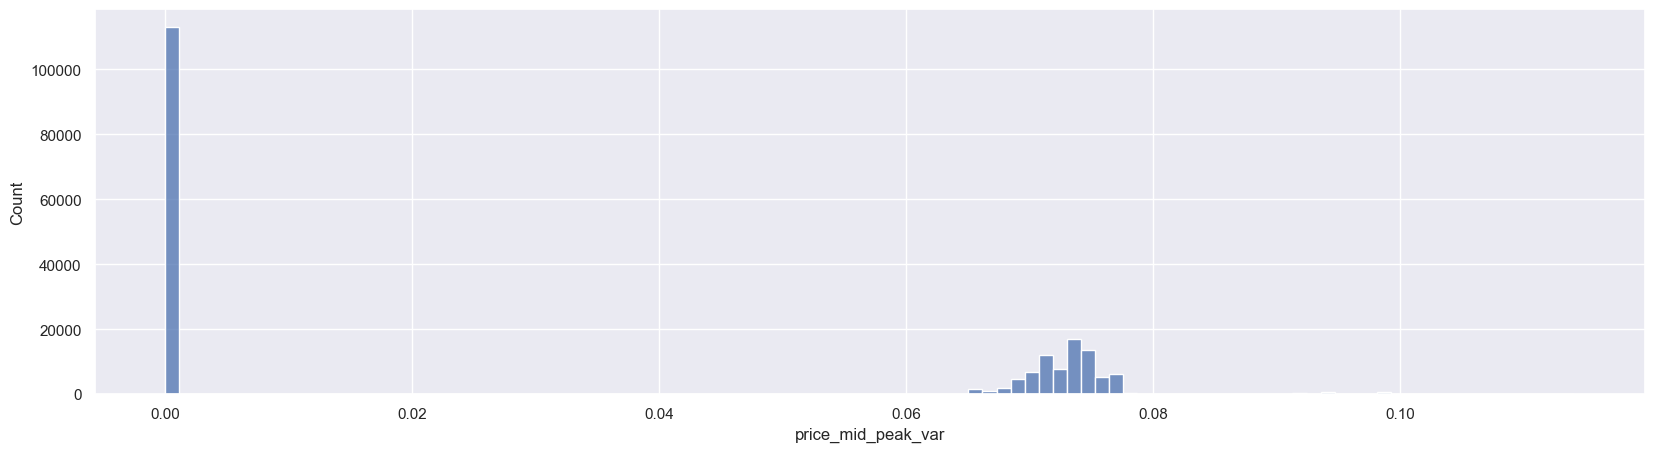

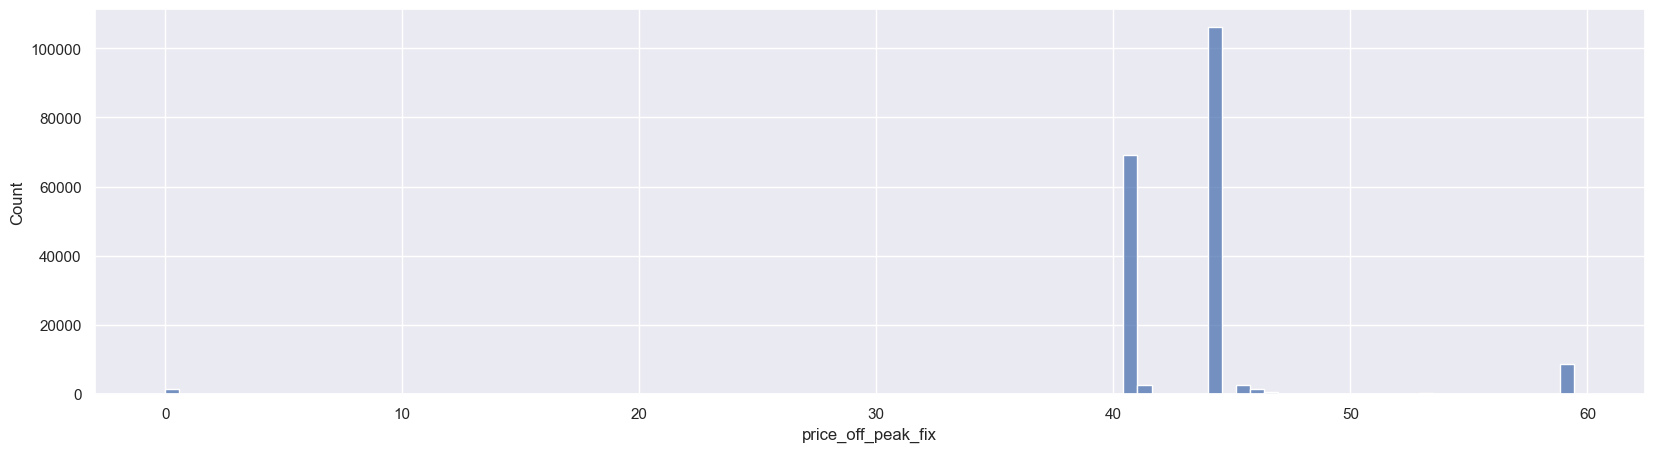

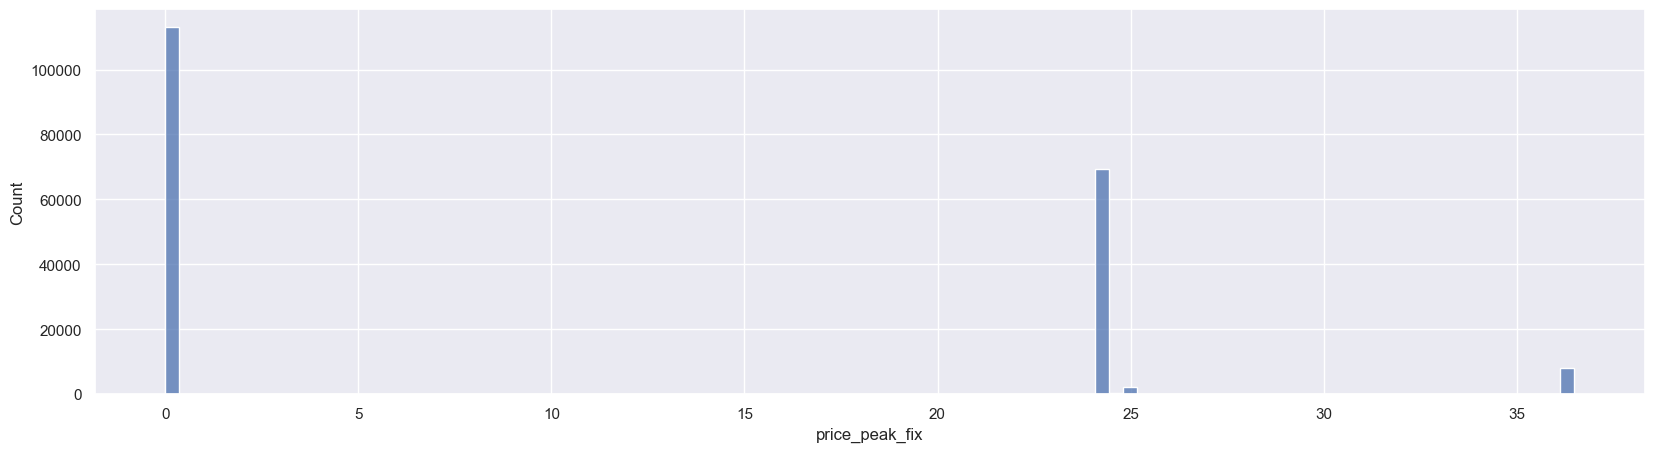

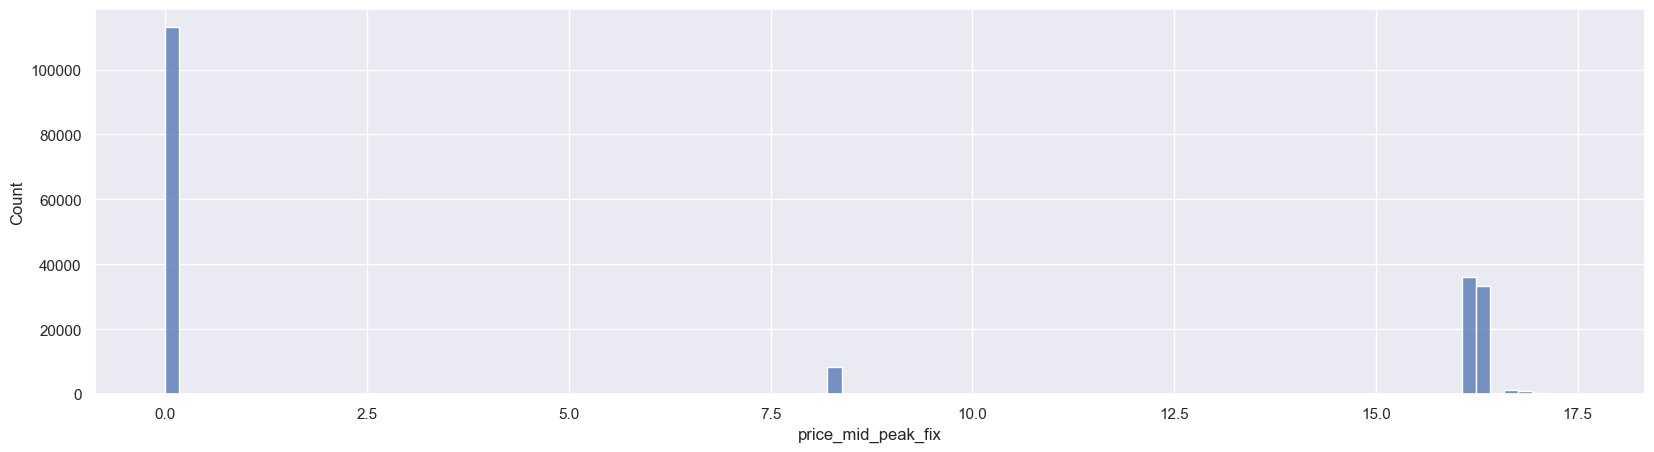

In [36]:
# plot histogram
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_df, target_variable=attr, if_churn=False)

A significant number of zero values have been observed for peak and mid-peak prices, whereas very few are noted for off-peak prices. Therefore, the analysis of price sensitivity will focus solely on off-peak prices.

### Investigating Price Sensitivity

If an increase in prices leads to higher customer attrition, it indicates price sensitivity. However, if prices decrease or remain unchanged and customers still leave, then attributing churn to price becomes less clear. Using 2015 consumption data, the research will create metrics based on annual, semi-annual, and quarterly averages to measure this sensitivity.

In [37]:
#Average data of the price

avg_year = price_df.groupby(['id']).mean().reset_index()
avg_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
avg_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [38]:
avg_year.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [39]:
#renaming the columns of average year
avg_year = avg_year.rename(

    columns={
        "price_off_peak_var": "avg_year_price_off_peak_var",
        "price_peak_var": "avg_year_price_peak_var",
        "price_mid_peak_var": "avg_year_price_mid_peak_var",
        "price_off_peak_fix": "avg_year_price_off_peak_fix",
        "price_peak_fix": "avg_year_price_peak_fix",
        "price_mid_peak_fix": "avg_year_price_mid_peak_fix"
    }
)
#Adding variable and fixed charges
avg_year["avg_year_price_off_peak"] = avg_year["avg_year_price_off_peak_var"] + avg_year["avg_year_price_off_peak_fix"]
avg_year["avg_year_price_peak"] = avg_year["avg_year_price_peak_var"] + avg_year["avg_year_price_peak_fix"]
avg_year["avg_year_price_med_peak"] = avg_year["avg_year_price_mid_peak_var"] + avg_year["avg_year_price_mid_peak_fix"]

In [40]:
#rename the columns of average 6 month
avg_6m = avg_6m.rename(

    columns={
        "price_off_peak_var": "avg_6m_price_off_peak_var",
        "price_peak_var": "avg_6m_price_peak_var",
        "price_mid_peak_var": "avg_6m_price_mid_peak_var",
        "price_off_peak_fix": "avg_6m_price_off_peak_fix",
        "price_peak_fix": "avg_6m_price_peak_fix",
        "price_mid_peak_fix": "avg_6m_price_mid_peak_fix"
    }
)

avg_6m["avg_6m_price_off_peak"]=avg_6m["avg_6m_price_off_peak_var"] + avg_6m["avg_6m_price_off_peak_fix"]
avg_6m["avg_6m_price_peak"]=avg_6m["avg_6m_price_peak_var"] + avg_6m["avg_6m_price_peak_fix"]
avg_6m["avg_6m_price_med_peak"]=avg_6m["avg_6m_price_mid_peak_var"] + avg_6m["avg_6m_price_mid_peak_fix"]

#rename the columns of average 3 month
avg_3m = avg_3m.rename(

    columns={
        "price_off_peak_var": "avg_3m_price_off_peak_var",
        "price_peak_var": "avg_3m_price_peak_var",
        "price_mid_peak_var": "avg_3m_price_mid_peak_var",
        "price_off_peak_fix": "avg_3m_price_off_peak_fix",
        "price_peak_fix": "avg_3m_price_peak_fix",
        "price_mid_peak_fix": "avg_3m_price_mid_peak_fix"
    }
)
avg_3m["avg_3m_price_off_peak"]=avg_3m["avg_3m_price_off_peak_var"] + avg_3m["avg_3m_price_off_peak_fix"]
avg_3m["avg_3m_price_peak"]=avg_3m["avg_3m_price_peak_var"] + avg_3m["avg_3m_price_peak_fix"]
avg_3m["avg_3m_price_med_peak"]=avg_3m["avg_3m_price_mid_peak_var"] + avg_3m["avg_3m_price_mid_peak_fix"]

In [41]:
#Merge each of the three into one
price_averaged=pd.merge(avg_year, avg_3m, on='id')
price_averaged=pd.merge(price_averaged, avg_6m, on='id')

In [42]:
price_averaged.head()

,id,price_date_x,avg_year_price_off_peak_var,avg_year_price_peak_var,avg_year_price_mid_peak_var,avg_year_price_off_peak_fix,avg_year_price_peak_fix,avg_year_price_mid_peak_fix,avg_year_price_off_peak,avg_year_price_peak,avg_year_price_med_peak,price_date_y,avg_3m_price_off_peak_var,avg_3m_price_peak_var,avg_3m_price_mid_peak_var,avg_3m_price_off_peak_fix,avg_3m_price_peak_fix,avg_3m_price_mid_peak_fix,avg_3m_price_off_peak,avg_3m_price_peak,avg_3m_price_med_peak,price_date,avg_6m_price_off_peak_var,avg_6m_price_peak_var,avg_6m_price_mid_peak_var,avg_6m_price_off_peak_fix,avg_6m_price_peak_fix,avg_6m_price_mid_peak_fix,avg_6m_price_off_peak,avg_6m_price_peak,avg_6m_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,2015-11-16,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,2015-09-15 20:00:00,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,2015-11-16,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,2015-09-15 20:00:00,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,2015-11-16,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,2015-09-15 20:00:00,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,2015-11-16,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964,2015-09-15 20:00:00,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,40.843313,24.533410,16.360973
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,2015-11-16,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,2015-09-15 20:00:00,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000


In [43]:
price_averaged.tail()

,id,price_date_x,avg_year_price_off_peak_var,avg_year_price_peak_var,avg_year_price_mid_peak_var,avg_year_price_off_peak_fix,avg_year_price_peak_fix,avg_year_price_mid_peak_fix,avg_year_price_off_peak,avg_year_price_peak,avg_year_price_med_peak,price_date_y,avg_3m_price_off_peak_var,avg_3m_price_peak_var,avg_3m_price_mid_peak_var,avg_3m_price_off_peak_fix,avg_3m_price_peak_fix,avg_3m_price_mid_peak_fix,avg_3m_price_off_peak,avg_3m_price_peak,avg_3m_price_med_peak,price_date,avg_6m_price_off_peak_var,avg_6m_price_peak_var,avg_6m_price_mid_peak_var,avg_6m_price_off_peak_fix,avg_6m_price_peak_fix,avg_6m_price_mid_peak_fix,avg_6m_price_off_peak,avg_6m_price_peak,avg_6m_price_med_peak
16090,ffef185810e44254c3a4c6395e6b4d8a,2015-06-16 12:00:00,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752,2015-11-16,0.112488,0.094804,0.068829,40.728885,24.43733,16.291555,40.841373,24.532134,16.360384,2015-09-15 20:00:00,0.113848,0.095499,0.068838,40.728885,24.437330,16.291555,40.842733,24.532829,16.360393
16091,fffac626da707b1b5ab11e8431a4d0a2,2015-06-16 12:00:00,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000,2015-11-16,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000,44.589757,0.000000,0.000000,2015-09-15 20:00:00,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,44.501269,0.000000,0.000000
16092,fffc0cacd305dd51f316424bbb08d1bd,2015-06-16 12:00:00,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411,2015-11-16,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555,41.380284,25.064201,16.882949,2015-09-15 20:00:00,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,41.381645,25.064896,16.882958
16093,fffe4f5646aa39c7f97f95ae2679ce64,2015-06-16 12:00:00,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414,2015-11-16,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,40.847060,24.537821,16.366071,2015-09-15 20:00:00,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,40.767579,24.490024,16.332952
16094,ffff7fa066f1fb305ae285bb03bf325a,2015-06-16 12:00:00,0.125360,0.104895,0.075635,40.647427,24.388455,16.258971,40.772788,24.493350,16.334606,2015-11-16,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,24.539562,16.367812,2015-09-15 20:00:00,0.121276,0.102927,0.076266,40.728885,24.437330,16.291555,40.850161,24.540257,16.367821


In [44]:
price_churn = pd.merge(price_averaged, client_df[['id', 'churn']], on='id')

In [45]:
price_churn.head()

,id,price_date_x,avg_year_price_off_peak_var,avg_year_price_peak_var,avg_year_price_mid_peak_var,avg_year_price_off_peak_fix,avg_year_price_peak_fix,avg_year_price_mid_peak_fix,avg_year_price_off_peak,avg_year_price_peak,avg_year_price_med_peak,price_date_y,avg_3m_price_off_peak_var,avg_3m_price_peak_var,avg_3m_price_mid_peak_var,avg_3m_price_off_peak_fix,avg_3m_price_peak_fix,avg_3m_price_mid_peak_fix,avg_3m_price_off_peak,avg_3m_price_peak,avg_3m_price_med_peak,price_date,avg_6m_price_off_peak_var,avg_6m_price_peak_var,avg_6m_price_mid_peak_var,avg_6m_price_off_peak_fix,avg_6m_price_peak_fix,avg_6m_price_mid_peak_fix,avg_6m_price_off_peak,avg_6m_price_peak,avg_6m_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,2015-11-16,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,2015-09-15 20:00:00,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283,0
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,2015-11-16,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,2015-09-15 20:00:00,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,2015-11-16,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,2015-09-15 20:00:00,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,2015-11-16,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,2015-09-15 20:00:00,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-06-16 12:00:00,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,2015-11-16,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,2015-09-15 20:00:00,0.123007,0.104108,0.075469,40.728885,24.43733,16.291555,40.851892,24.541438,16.367024,0


In [46]:
#merging the client data with price churn data
churn_data = pd.merge(client_df.drop(columns=['churn']), price_churn, on='id')

In [47]:
churn_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_date_x,avg_year_price_off_peak_var,avg_year_price_peak_var,avg_year_price_mid_peak_var,avg_year_price_off_peak_fix,avg_year_price_peak_fix,avg_year_price_mid_peak_fix,avg_year_price_off_peak,avg_year_price_peak,avg_year_price_med_peak,price_date_y,avg_3m_price_off_peak_var,avg_3m_price_peak_var,avg_3m_price_mid_peak_var,avg_3m_price_off_peak_fix,avg_3m_price_peak_fix,avg_3m_price_mid_peak_fix,avg_3m_price_off_peak,avg_3m_price_peak,avg_3m_price_med_peak,price_date,avg_6m_price_off_peak_var,avg_6m_price_peak_var,avg_6m_price_mid_peak_var,avg_6m_price_off_peak_fix,avg_6m_price_peak_fix,avg_6m_price_mid_peak_fix,avg_6m_price_off_peak,avg_6m_price_peak,avg_6m_price_med_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,2015-06-16 12:00:00,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,2015-11-16,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,2015-09-15 20:00:00,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,2015-06-16 12:00:00,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,2015-11-16,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,2015-09-15 20:00:00,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.014247,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2015-06-16 12:00:00,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,2015-11-16,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,2015-09-15 20:00:00,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.088535,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,2015-06-16 12:00:00,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,2015-11-16,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,2015-09-15 20:00:00,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,2015-06-16 12:00:00,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,40.812330,24.516531,16.348129,2015-11-16,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,2015-09-15 20:00:00,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,24.539698,16.365283,0


In [48]:
churn_data = churn_data.drop('price_date_x', axis=1)

In [49]:
#Converting the churn data to csv file for further analysis
churn_data.to_csv('processed_data.csv')

The Exploratory Data Analysis of the data is done and now the next step will be to apply Feature Engineering & Modelling to find solutions.